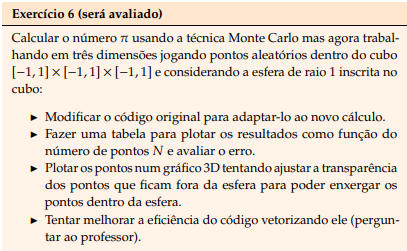

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def find_pi(num_pontos):
    x = 2*np.random.rand(num_pontos) -1
    y = 2*np.random.rand(num_pontos) -1
    z = 2*np.random.rand(num_pontos) -1
    raio = x**2 + y**2 + z**2
    pi = (3/4)* np.sum(np.int16(raio<1))/num_pontos * 8

    #V = 4/3 pi
    
    return pi

In [15]:
def find_avg_pi(num_pontos, num_iterations):
    pi_values = []
    for i in range(num_iterations):
        pi_values.append(find_pi(num_pontos))
    pi_values = np.array(pi_values)
    
    return (pi_values.mean(), pi_values.std(ddof=1))

In [16]:
num_pontos_list = [1e3, 1e4,1e5, 1e6, 1e7]
avg_pi_list = []
avg_pi_list_err = []

num_iterations = 10

for num_pontos in num_pontos_list:
    pi, pi_err = find_avg_pi(int(num_pontos), num_iterations)
    avg_pi_list.append(pi)
    avg_pi_list_err.append(pi_err)
    print("Feito " + str(num_pontos))

Feito 1000.0
Feito 10000.0
Feito 100000.0
Feito 1000000.0
Feito 10000000.0


In [17]:
avg_pi_list = np.array(avg_pi_list)
avg_pi_list_err = np.array(avg_pi_list_err)

[3.111      3.15606    3.139536   3.1421316  3.14176488]


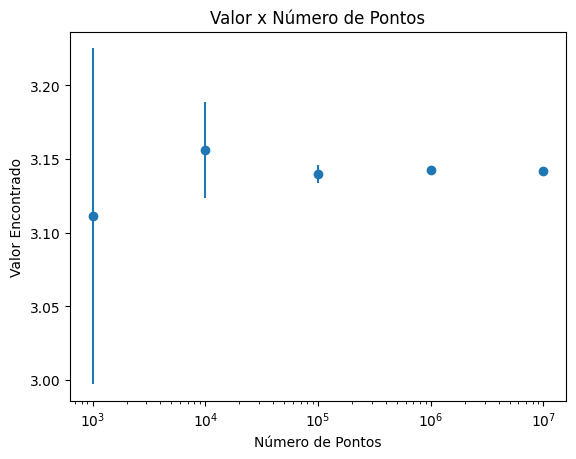

In [18]:
plt.errorbar(num_pontos_list, avg_pi_list, yerr=avg_pi_list_err, marker = 'o', ls = '')
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Valor Encontrado")
plt.title("Valor x Número de Pontos")

print(avg_pi_list)

Text(0.5, 1.0, 'Erro x Número de Pontos')

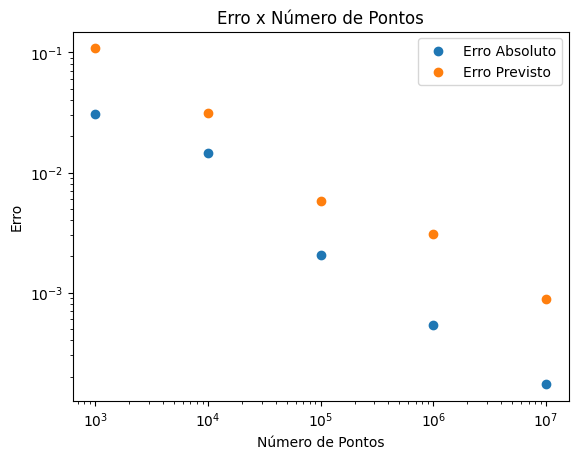

In [19]:
erro_absoluto = np.abs(avg_pi_list - np.pi)
erro_previsto = avg_pi_list_err/np.sqrt(num_iterations) * 3 #intervalo de confiança de 98%

plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")

Text(0.5, 1.0, 'Erro x Número de Pontos')

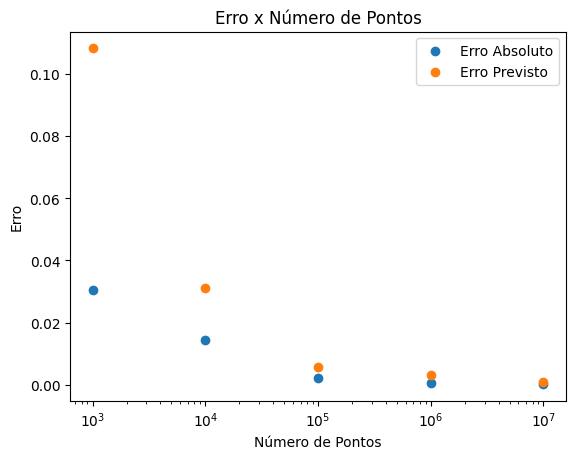

In [20]:
erro_absoluto = np.abs(avg_pi_list - np.pi)
erro_previsto = avg_pi_list_err/np.sqrt(num_iterations) * 3 #intervalo de confiança de 98%

plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")

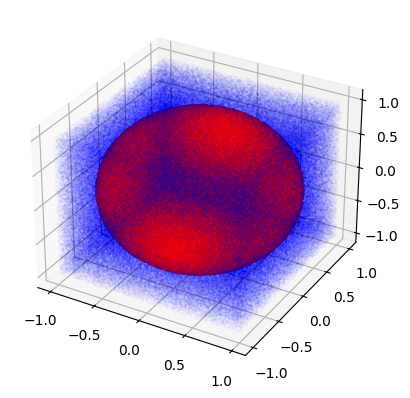

In [28]:
#Gráfico 3D
num_pontos = int(1e6)

x = 2*np.random.rand(num_pontos) -1
y = 2*np.random.rand(num_pontos) -1
z = 2*np.random.rand(num_pontos) -1
raio = x**2 + y**2 + z**2
condicao = raio<1
not_condicao = condicao == 0

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[condicao], y[condicao], z[condicao], color = 'red', s=0.1, alpha=1)
ax.scatter(x[not_condicao], y[not_condicao], z[not_condicao], color = 'blue', s=0.1, alpha = 0.03)